<a href="https://colab.research.google.com/github/vagdevik/SDS-Wine-Dataset/blob/master/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

In [0]:
data=datasets.load_wine(return_X_y=True)

In [0]:
data

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [0]:
data = datasets.load_wine()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [0]:
print (df)

     alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0      14.23        1.71  2.43  ...                          3.92   1065.0     0.0
1      13.20        1.78  2.14  ...                          3.40   1050.0     0.0
2      13.16        2.36  2.67  ...                          3.17   1185.0     0.0
3      14.37        1.95  2.50  ...                          3.45   1480.0     0.0
4      13.24        2.59  2.87  ...                          2.93    735.0     0.0
5      14.20        1.76  2.45  ...                          2.85   1450.0     0.0
6      14.39        1.87  2.45  ...                          3.58   1290.0     0.0
7      14.06        2.15  2.61  ...                          3.58   1295.0     0.0
8      14.83        1.64  2.17  ...                          2.85   1045.0     0.0
9      13.86        1.35  2.27  ...                          3.55   1045.0     0.0
10     14.10        2.16  2.30  ...                          3.17   1510.0     0.0
11  

In [0]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [0]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Text(0, 0.5, 'Frequency')

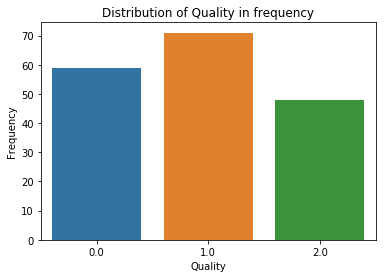

In [0]:
ax = sns.countplot(x="target", data=df)
plt.title('Distribution of Quality in frequency')
plt.xlabel('Quality')
plt.ylabel('Frequency')

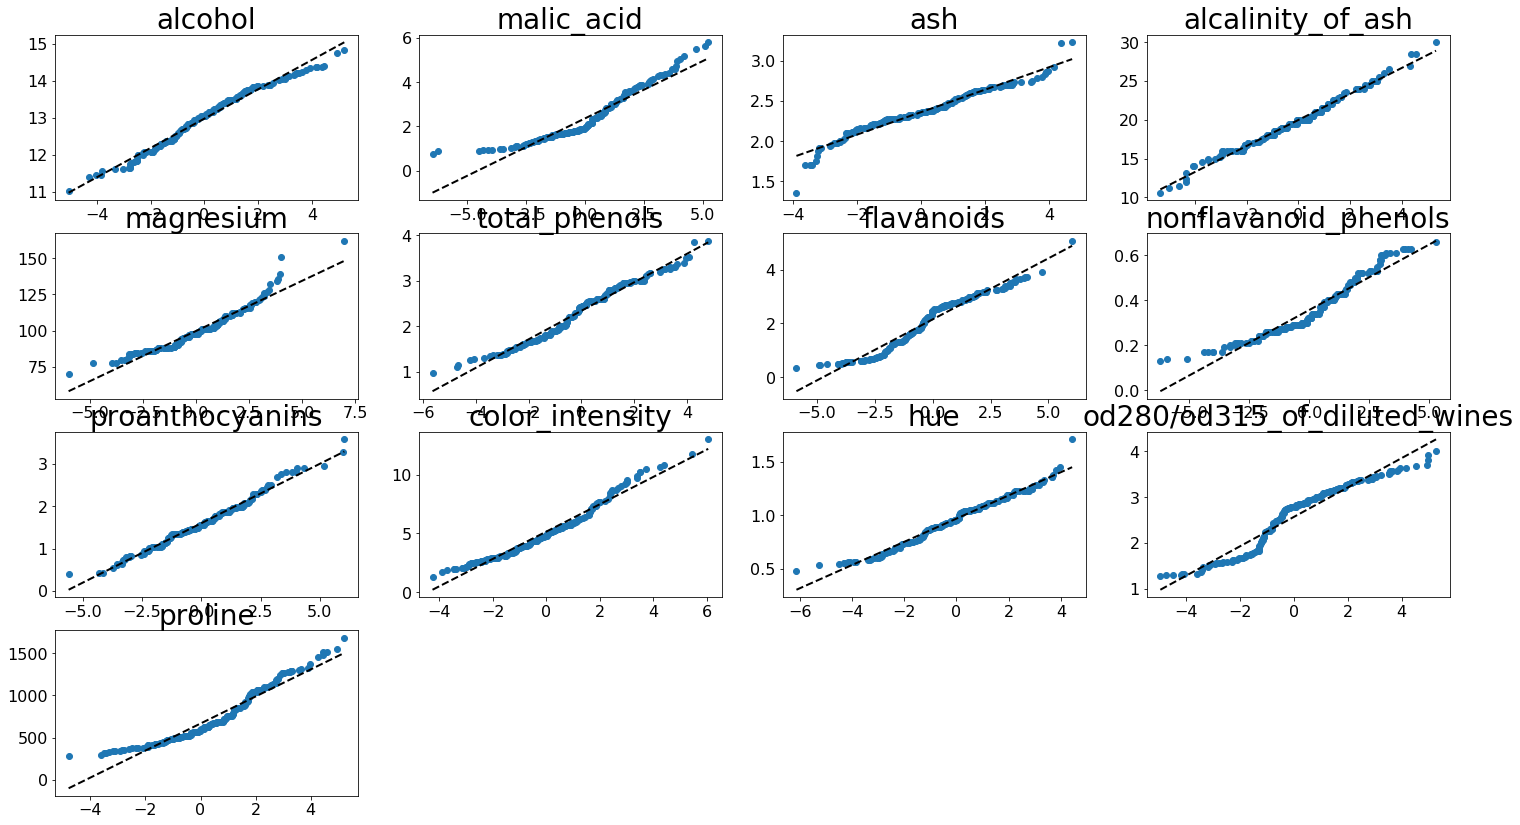

In [0]:
import numpy.random as random

plt.figure(figsize=(25,14),facecolor='1.0')

for i in range(1,14):
    plt.subplot(4,4, i)
    data=np.array(df[df.columns[i-1]])
    data.sort()
    norm=random.normal(0, 2, len(data))
    norm.sort()
    
    plt.plot(norm,data,"o")
    
    z = np.polyfit(norm,data, 1)
    p = np.poly1d(z)
    plt.plot(norm,p(norm),"k--", linewidth=2)
    plt.title(df.columns[i-1], size=28)
    plt.tick_params(labelsize=16)

In [0]:
max(df['alcohol'])

14.83

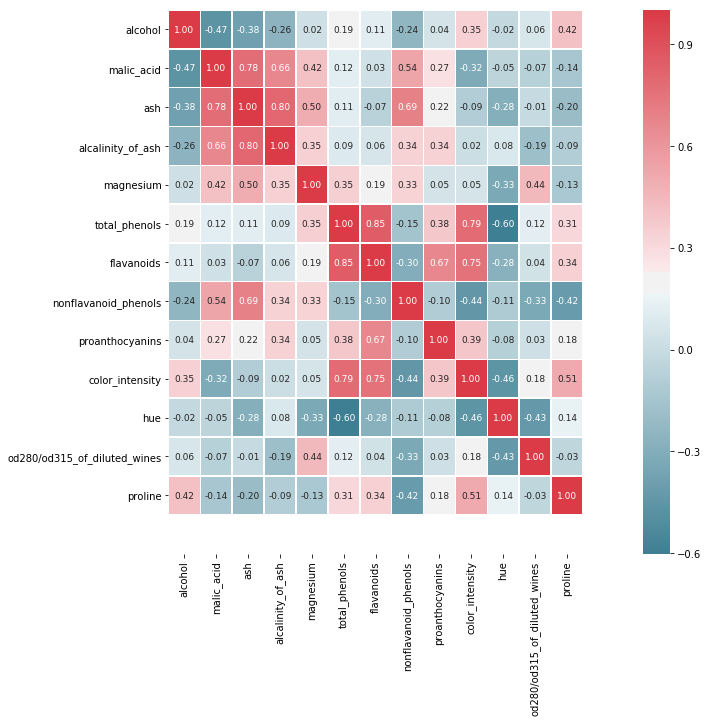

In [0]:
import seaborn as sns
dmap=df[:13]
corr = dmap.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values[:13],
            yticklabels=corr.columns.values[:13],
            annot=True, annot_kws={"size": 9},
            linewidths = 0.5,
            fmt = ".2f",
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [0]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle
shuffled_df = shuffle(df)

x,y = shuffled_df.loc[:,shuffled_df.columns != 'target'], shuffled_df.loc[:,'target']

#print(x)
#print(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (k=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (k=3) accuracy is:  0.6851851851851852


In [0]:
#LR
from sklearn.linear_model import LogisticRegression

In [0]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
clf.score(x_test, y_test)

0.9259259259259259

In [0]:
#DTC
from sklearn.tree import DecisionTreeClassifier 

In [0]:
dtree = DecisionTreeClassifier(random_state = 0,max_depth=5, min_samples_leaf=5)
dtree.fit(x_train, y_train) 
dtree.score(x_test, y_test)

0.8518518518518519

In [0]:
#SVC
from sklearn.svm import SVC
clf = SVC(gamma='scale')
clf.fit(x_train, y_train) 
clf.score(x_test, y_test)

0.7222222222222222

In [0]:
#RFC
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [0]:
clf.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
clf.score(x_test, y_test)

0.9814814814814815

In [0]:
#ABC
from sklearn.ensemble import AdaBoostClassifier

In [0]:
clf=AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9259259259259259

In [0]:
#XGB
from xgboost import XGBClassifier

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.59%


In [0]:
import matplotlib.pyplot as plt

In [0]:
algos=['LogiReg', 'KNN', 'DTreeClassifier', 'SVC', 'AdaClassifer', 'RForestC', 'XGB']
acc=[0.9259259259259259, 0.6851851851851852, 0.8518518518518519, 0.7222222222222222, 0.9259259259259259, 0.9814814814814815, 0.923333333333333]

Text(0, 0.5, 'Accuracy')

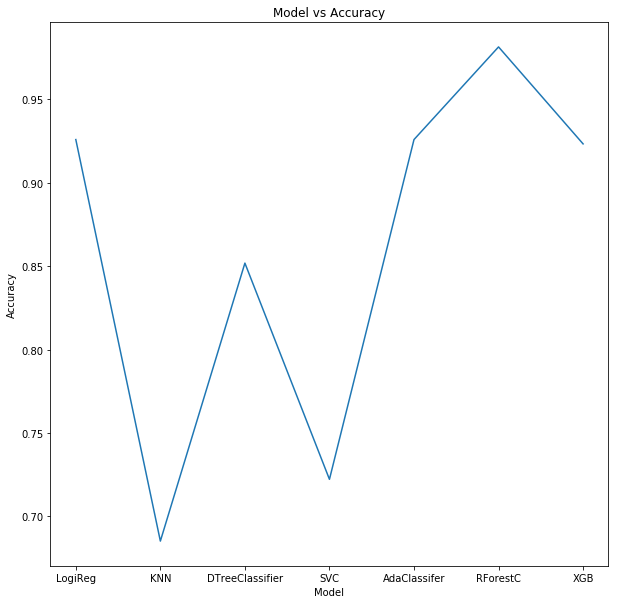

In [0]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
plt.plot(algos, acc)
plt.title('Model vs Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')